# "Data-driven Optimization of User Experience: An In-depth Analysis of App Engagement and Visualization"

### Data-driven Optimization of User Experience

#### Sales Funnel Analysis
The objective is to meticulously examine the sales funnel to ascertain how users progress toward the purchase phase. This analysis will involve:
- **Determining the number of users who successfully reach the purchase stage.**
- **Identifying and quantifying any drop-off points within the funnel,** noting which specific stages exhibit the highest user attrition.
- **Pinpointing stages that may require optimization** to enhance user progression and conversion rates.

#### A/A/B Testing Analysis
In response to a proposed update involving a font change across the app, a strategic decision will be based on the outcomes of an A/A/B test. This test is structured as follows:
- Users are divided into three groups: two control groups that will continue to view the existing fonts (**A groups**) and one test group that will experience the new fonts (**B group**).
- The primary aim is to **evaluate the impact of the new fonts on user behavior and app performance** by comparing the test group against the control groups.

#### Advantages of Dual Control Groups
The implementation of two control groups offers substantial benefits:
- **It establishes a robust baseline for the test,** enhancing the confidence in the findings by ensuring that both control groups exhibit similar behaviors.
- **Discrepancies between the control groups could reveal external variables** potentially influencing the results, thereby aiding in the refinement of our testing methodology.
- This comparative analysis also assists in determining the requisite scope and scale for subsequent tests, **guiding resource allocation and timeline estimations.**

This structured approach will not only validate the proposed font change but also contribute to a deeper understanding of user behavior, which is critical for driving data-driven enhancements to the app’s user interface.




## Data Cleaning and Analysis

After loading the dataframe, we'll dedicate time to refining it to ensure it's prepared for analysis. This data cleaning process involves rectifying or eliminating incorrect or redundant data, as well as addressing incompleteness or inconsistencies.

Following the data cleaning phase, we will proceed to slice the data to extract valuable insights. Leveraging various techniques and analytical methods, we will uncover hidden patterns and relationships, ultimately deriving insights and making predictions.

Once the results have been interpreted and meaningful insights drawn, our next step is to create visualizations. This involves selecting the most suitable charts and graphs to effectively communicate the findings.

This comprehensive approach to data cleaning, analysis, and visualization will facilitate a deeper understanding of the dataset and enable informed decision-making.


# Step 1. Load the librariaries, open the data file and read the general information

In [1]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from datetime import datetime
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats as st
import numpy as np
import math as mth
import plotly.express as px

In [2]:
pip install -U kaleido


In [3]:
try:
    df=pd.read_csv('/datasets/logs_exp_us.csv',sep='\t')
    
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets//logs_exp_us.csv',sep='\t')



In [4]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Description of the data: Each log entry is a user action or an event.
* EventName — event name 
* DeviceIDHash — unique user identifier 
* EventTimestamp — event time 
* ExpId — experiment number: 246 and 247 are the control groups, 248 is the test group

# Step 2. Prepare the data for analysis

##### Rename the columns in a way that’s convenient for further coding

In [5]:
df.columns =['event_name','user_id','timestamp','experiment_id']

##### check for missing values and change datatype to speed up the process and save memory.

In [6]:
df.sample(10)

,event_name,user_id,timestamp,experiment_id
133997,OffersScreenAppear,5051786623126900570,1564938476,247
82189,MainScreenAppear,8428513121714221084,1564822384,246
9436,CartScreenAppear,20795828045873027,1564646515,246
34563,MainScreenAppear,388887996611251404,1564685273,246
167810,OffersScreenAppear,3154316348373047511,1565022535,248
230801,CartScreenAppear,3573586078352175315,1565187154,248
864,MainScreenAppear,6227297080395755491,1564552936,246
209588,MainScreenAppear,6224642068766507557,1565118266,248
60099,MainScreenAppear,499118262689586521,1564755130,247
123454,MainScreenAppear,3012866736489345415,1564921616,246


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   event_name     244126 non-null  object
 1   user_id        244126 non-null  int64 
 2   timestamp      244126 non-null  int64 
 3   experiment_id  244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


There aren't missing values. 

We need to change the type of the column timestamp from integer to datetime to see what is the actual date:

In [8]:
df['timestamp']=df['timestamp'].apply(lambda x:datetime.fromtimestamp(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_name     244126 non-null  object        
 1   user_id        244126 non-null  int64         
 2   timestamp      244126 non-null  datetime64[ns]
 3   experiment_id  244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


In [9]:
df.head()

,event_name,user_id,timestamp,experiment_id
0,MainScreenAppear,4575588528974610257,2019-07-25 07:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 14:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 14:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 14:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 14:48:42,248


Add a separate column for dates

In [10]:
df['date'] = df['timestamp'].dt.date

In [11]:
df.head()

,event_name,user_id,timestamp,experiment_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 07:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 14:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 14:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 14:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 14:48:42,248,2019-07-25


##### Let's check for duplicated rows:

In [12]:
df.duplicated().sum()

413

In [13]:
df[df.duplicated()].head()

,event_name,user_id,timestamp,experiment_id,date
453,MainScreenAppear,5613408041324010552,2019-07-30 11:19:44,248,2019-07-30
2350,CartScreenAppear,1694940645335807244,2019-08-01 00:51:39,248,2019-08-01
3573,MainScreenAppear,434103746454591587,2019-08-01 05:59:37,248,2019-08-01
4076,MainScreenAppear,3761373764179762633,2019-08-01 06:47:46,247,2019-08-01
4803,MainScreenAppear,2835328739789306622,2019-08-01 07:44:01,248,2019-08-01


In [14]:
for i in df[df.duplicated()].columns:
    print(i,':', df[df.duplicated()][i].nunique())

event_name : 5
user_id : 237
timestamp : 352
experiment_id : 3
date : 8


In [15]:
df[df.duplicated()]['timestamp'].dt.date.unique()

array([datetime.date(2019, 7, 30), datetime.date(2019, 8, 1),
       datetime.date(2019, 8, 2), datetime.date(2019, 8, 3),
       datetime.date(2019, 8, 4), datetime.date(2019, 8, 5),
       datetime.date(2019, 8, 6), datetime.date(2019, 8, 7)], dtype=object)

In [16]:
df[df.duplicated()]['timestamp'].dt.date.nunique()

8

# Addressing Technical Issues in A/B Testing

It's crucial to acknowledge that technical issues, such as those encountered in A/B testing, can potentially disrupt product functionality and data integrity. Therefore, it's imperative to thoroughly investigate and identify areas where problems may arise.

The occurrence of duplicate entries seems to be sporadic, appearing across various dates, groups, and users. This randomness suggests that the technical glitches responsible for these duplicates manifested unpredictably, making it challenging to pinpoint their root cause. Consequently, this prevalence of random duplicates raises concerns about the reliability of the entire testing process. Can we confidently trust all the server information?

In this project, despite the widespread presence of duplicates across multiple columns, I've made the decision to proceed with the analysis without removing them. Removing duplicates could inadvertently skew the dataset and potentially compromise the integrity of our findings. Therefore, my approach is to carefully navigate through the data while considering the implications of these duplicates on our analyses.


We need to verify if there are users who got simultaneously in two groups or in two tests:

In [17]:
a=df.groupby(['user_id'])['experiment_id'].nunique().reset_index()
a.head()

,user_id,experiment_id
0,6888746892508752,1
1,6909561520679493,1
2,6922444491712477,1
3,7435777799948366,1
4,7702139951469979,1


In [18]:
a=a.query('experiment_id>1')

In [19]:
a.head()

,user_id,experiment_id


we don't have users simultaneously in two groups.

# Step 3. Study and check the data

##### How many events are in the logs?

In [20]:
df.event_name.unique()


array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [21]:
n_events=df.event_name.nunique()
print(n_events)

5


5 events in the log

##### How many users are in the logs?

In [22]:
n_users=df['user_id'].nunique()
print ("In the logs there are", n_users ,"users")

In the logs there are 7551 users


##### What's the average number of events per user?

In [23]:
event_per_user=df.groupby(['user_id'])['event_name'].count().reset_index()

In [24]:
event_per_user.columns=['user_id', 'number_events']

In [25]:
event_per_user.describe()

,user_id,number_events
count,7.551000e+03,7551.000000
mean,4.677319e+18,32.330287
std,2.655343e+18,65.312344
min,6.888747e+15,1.000000
25%,2.397700e+18,9.000000
50%,4.688022e+18,20.000000
75%,7.007353e+18,37.500000
max,9.222603e+18,2308.000000


In [26]:
df.groupby(['user_id'])['event_name'].count().mean()

32.33028737915508

In [27]:
avg_event=(event_per_user.number_events.sum())/n_users
print(avg_event)

32.33028737915508


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


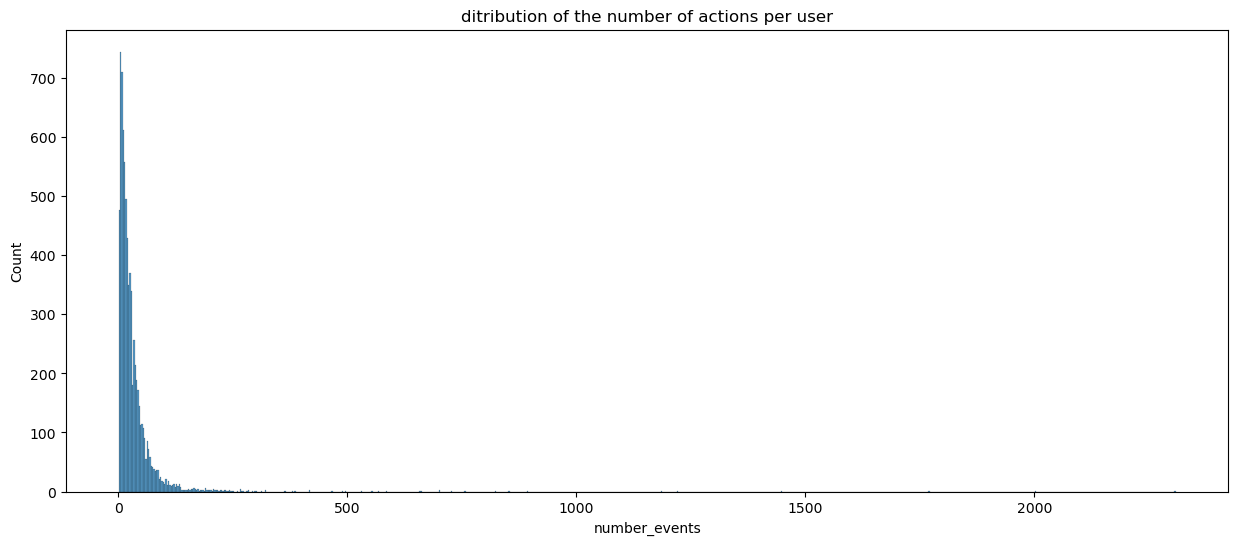

In [28]:
plt.rcParams["figure.figsize"] = (15,6)
sns.histplot(event_per_user['number_events'])
plt.title('ditribution of the number of actions per user')
plt.show()

From the description and the distplot, we can see that the number of events per user, follows a skewed distribution. it will be more correct to calculate median instead of mean

In [29]:
df.groupby(['user_id'])['event_name'].count().median()

20.0

So, in average, each user does 32 action, or have a median of 20 total actions. But, how many users go through the whole funnel? How many users complete all the events? Number of unique events and number of actions are different parameters, let's see how many users complete all the 5 actions:

In [30]:
df.groupby(['user_id'])['event_name'].nunique().reset_index()

,user_id,event_name
0,6888746892508752,1
1,6909561520679493,4
2,6922444491712477,4
3,7435777799948366,1
4,7702139951469979,4
...,...,...
7546,9217594193087726423,3
7547,9219463515465815368,4
7548,9220879493065341500,3
7549,9221926045299980007,1


In [31]:
total_un_events=df.groupby(['user_id'])['event_name'].nunique().reset_index()['event_name'].value_counts()
print(total_un_events)

event_name
4    3035
1    2707
2    1021
5     471
3     317
Name: count, dtype: int64


LESS THAN HALF OF USERS COMPLETED 4 ACTIONS. It means that the users experience is not very effective.

* What period of time does the data cover? 



C:\Users\User\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


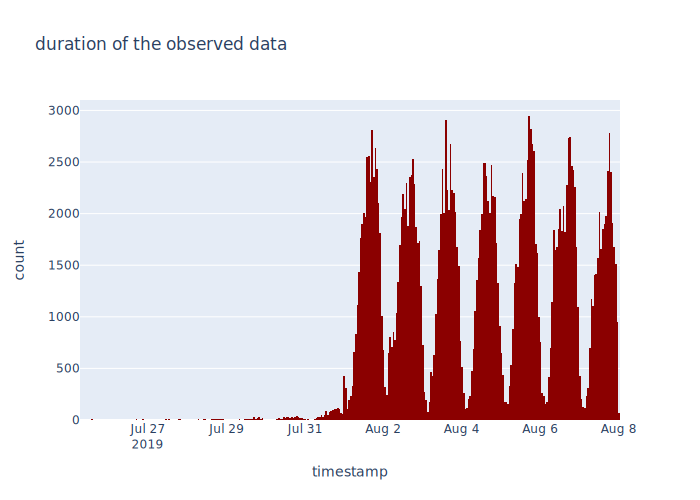

In [32]:

fig = px.histogram(df, x="timestamp", color_discrete_sequence = ['darkred'], title='duration of the observed data')
fig.show(renderer="svg")

C:\Users\User\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



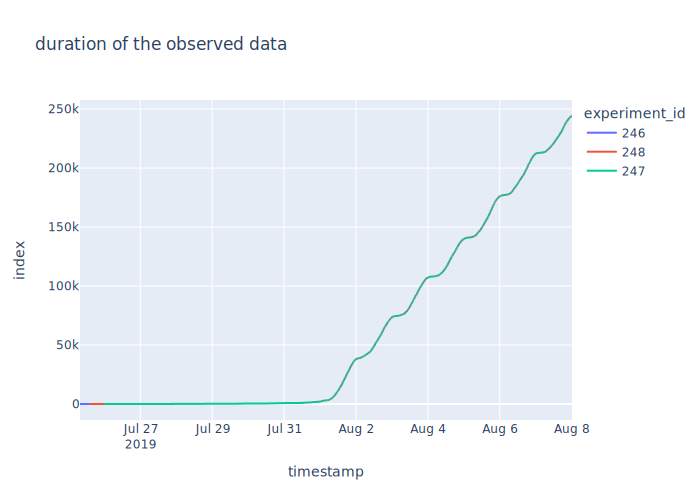

In [33]:
fig = px.line(df, x="timestamp",  color='experiment_id', title='duration of the observed data')
fig.show(renderer="svg")

let's find min and max date of the tests with the code:

In [34]:
df.groupby(['event_name']).agg({'timestamp': [np.min,np.max]})

C:\Users\User\AppData\Local\Temp\ipykernel_7460\1490447720.py:1: FutureWarning:

The provided callable <function min at 0x00000252FF97FBA0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

C:\Users\User\AppData\Local\Temp\ipykernel_7460\1490447720.py:1: FutureWarning:

The provided callable <function max at 0x00000252FF97FA60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



timestamp                    
                                        min                 max
event_name                                                     
CartScreenAppear        2019-07-25 14:28:47 2019-08-08 00:07:08
MainScreenAppear        2019-07-25 07:43:36 2019-08-08 00:14:58
OffersScreenAppear      2019-07-25 17:50:42 2019-08-08 00:15:17
PaymentScreenSuccessful 2019-07-25 14:28:47 2019-08-08 00:07:08
Tutorial                2019-07-26 21:03:59 2019-08-07 23:23:52

In [35]:
df.groupby(['user_id']).agg({'timestamp': [np.min,np.max]})

C:\Users\User\AppData\Local\Temp\ipykernel_7460\3547393814.py:1: FutureWarning:

The provided callable <function min at 0x00000252FF97FBA0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

C:\Users\User\AppData\Local\Temp\ipykernel_7460\3547393814.py:1: FutureWarning:

The provided callable <function max at 0x00000252FF97FA60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



timestamp                    
                                    min                 max
user_id                                                    
6888746892508752    2019-08-06 17:06:34 2019-08-06 17:06:34
6909561520679493    2019-08-06 21:52:54 2019-08-06 21:53:04
6922444491712477    2019-08-04 17:19:33 2019-08-06 18:54:47
7435777799948366    2019-08-05 11:06:34 2019-08-07 10:55:12
7702139951469979    2019-08-01 07:29:54 2019-08-07 19:05:44
...                                 ...                 ...
9217594193087726423 2019-08-02 12:00:57 2019-08-03 11:09:25
9219463515465815368 2019-08-05 08:26:26 2019-08-07 17:25:00
9220879493065341500 2019-07-29 17:29:58 2019-08-03 17:17:53
9221926045299980007 2019-08-01 20:30:27 2019-08-05 19:45:59
9222603179720523844 2019-08-01 09:52:13 2019-08-07 12:16:20

[7551 rows x 2 columns]

In [36]:
df["timestamp"]. min() 

Timestamp('2019-07-25 07:43:36')

In [37]:
df["timestamp"]. max() 


Timestamp('2019-08-08 00:15:17')

So the first date of the test is the 25 july and the last date is the 8th of August. All the different events records start and finish in the same dates. Different Users instead, begin with the fist action in different times

Can we be sure that you have equally complete data for the entire period?

We have data starting from 25 of july, but the actual events start from 1st of august. by the observation of the histogram, appeard that from th 25 of july to the first of august the data are not equal, nor complete, with th comparison of the second part of the plot( from 1st of august).*** Since we don't know how users were assigned to the tests, I would remove all the USERS assigned before the 1st of august.***

That's because older events could end up in some users' logs for technical reasons, and this could skew the overall picture. The 1st of august is moment at which the data starts to be complete, so I will ignore the earlier section.

In [38]:
df.sample(10)


,event_name,user_id,timestamp,experiment_id,date
181539,PaymentScreenSuccessful,1754140665440434215,2019-08-06 08:58:18,247,2019-08-06
172320,CartScreenAppear,1480693827871957415,2019-08-05 21:22:17,248,2019-08-05
163120,CartScreenAppear,3317930009587396663,2019-08-05 17:51:44,246,2019-08-05
38981,OffersScreenAppear,2711431397924822327,2019-08-02 02:37:11,248,2019-08-02
127207,CartScreenAppear,2571057252346605950,2019-08-04 17:07:00,247,2019-08-04
186811,MainScreenAppear,6098687849099133899,2019-08-06 12:01:06,247,2019-08-06
102556,PaymentScreenSuccessful,3890037538788212642,2019-08-03 20:39:09,246,2019-08-03
51731,MainScreenAppear,3933415997375240038,2019-08-02 13:16:24,246,2019-08-02
209277,PaymentScreenSuccessful,2754977819347976900,2019-08-06 21:54:40,247,2019-08-06
224838,MainScreenAppear,611626688613840894,2019-08-07 14:04:46,247,2019-08-07


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_name     244126 non-null  object        
 1   user_id        244126 non-null  int64         
 2   timestamp      244126 non-null  datetime64[ns]
 3   experiment_id  244126 non-null  int64         
 4   date           244126 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 9.3+ MB


In [40]:
s=df.loc[df['timestamp'].dt.month < 8]
u=s.user_id.unique()
s.user_id.nunique()


1319

In [41]:
df.drop(df[(df['user_id'].isin(u))].index, inplace=True)

In [42]:
df.sample(10)


,event_name,user_id,timestamp,experiment_id,date
180390,OffersScreenAppear,6262841230086289949,2019-08-06 08:26:31,248,2019-08-06
58061,MainScreenAppear,3509209438477725785,2019-08-02 16:21:52,248,2019-08-02
119888,OffersScreenAppear,3976695185007308383,2019-08-04 13:56:27,248,2019-08-04
82106,MainScreenAppear,787019918811618763,2019-08-03 11:49:35,247,2019-08-03
50422,MainScreenAppear,4523373475875031235,2019-08-02 12:42:27,246,2019-08-02
165518,CartScreenAppear,6532653549075824834,2019-08-05 18:41:43,247,2019-08-05
199486,OffersScreenAppear,7716966784740554487,2019-08-06 17:58:25,247,2019-08-06
210024,MainScreenAppear,646027458777469832,2019-08-06 22:21:05,248,2019-08-06
29936,MainScreenAppear,1866081895270239546,2019-08-01 19:46:25,247,2019-08-01
211646,PaymentScreenSuccessful,8309980273750324949,2019-08-06 23:28:55,246,2019-08-06


C:\Users\User\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



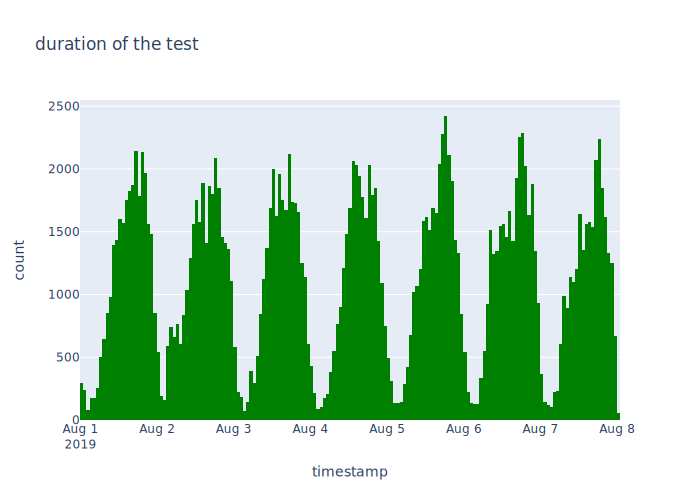

In [43]:
fig = px.histogram(df, x="timestamp", color_discrete_sequence = ['green'], title='duration of the test')
fig.show(renderer="svg")

C:\Users\User\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



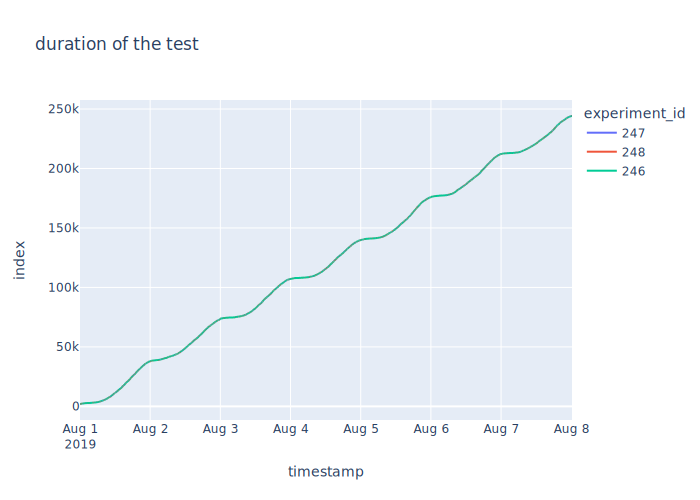

In [44]:
fig = px.line(df, x="timestamp",  color='experiment_id', title='duration of the test')
fig.show(renderer="svg")

In [45]:
df.user_id.nunique()

6232

In [46]:
df.event_name.nunique()

5

In [47]:
df.experiment_id.nunique()


3

In [48]:
total_un_events_2=df.groupby(['user_id'])['event_name'].nunique().reset_index()['event_name'].value_counts()
total_un_events_2

event_name
4    2448
1    2186
2     861
5     467
3     270
Name: count, dtype: int64

In [49]:
data = pd.DataFrame(columns = ['unique_events_1', 'unique_events_2'])

In [50]:
data['unique_events_1'] = total_un_events

data['unique_events_2'] = total_un_events_2

In [51]:
data['unique_events_loss']=data['unique_events_1']-data['unique_events_2'] 
data

,unique_events_1,unique_events_2,unique_events_loss
event_name,,,
4,3035,2448,587
1,2707,2186,521
2,1021,861,160
5,471,467,4
3,317,270,47


In [52]:
data['unique_events_loss'].sum()

1319

In [53]:
data['unique_events_1'].sum()

7551

In [54]:
data['unique_events_2'].sum()

6232

In [55]:
(data['unique_events_loss'].sum()/data['unique_events_1'].sum()) *100

17.46788504833797

We lost 1319 events, with a percentage of 17.5.

It's s a considerable amount, however, we cannot account for this data, we can't rely on them and they're not consistent with the rest of the test, so i's a better option to remove them.

# Step 4. Study the event funnel

* See what events are in the logs and their frequency of occurrence. Sort them by frequency.
* Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.
* In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
* Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
* At what stage do you lose the most users?
What share of users make the entire journey from their first event to payment?

##### See what events are in the logs and their frequency of occurrence. Sort them by frequency.

In [56]:
df.groupby(['event_name'])['user_id'].count().sort_values(ascending=False)

event_name
MainScreenAppear           92879
OffersScreenAppear         38693
CartScreenAppear           33383
PaymentScreenSuccessful    26656
Tutorial                    1034
Name: user_id, dtype: int64

##### Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.

In [57]:
df.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False)

event_name
MainScreenAppear           6147
OffersScreenAppear         3836
CartScreenAppear           3095
PaymentScreenSuccessful    2931
Tutorial                    836
Name: user_id, dtype: int64

In [58]:
df.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False)/df.user_id.nunique()

event_name
MainScreenAppear           0.986361
OffersScreenAppear         0.615533
CartScreenAppear           0.496630
PaymentScreenSuccessful    0.470315
Tutorial                   0.134146
Name: user_id, dtype: float64

From the total Users, 47% completed a purchase successfully and we can see that we don't lose many users in the funnel from the cart screen to the payment screen

##### In what order do you think the actions took place: 

The typical order is Main screen, Offers, Cart, Payment, probably with a skippable Tutorial.
Actually, some userd cold just have skip ofeers, for example and go directly to payment.

it's interesting to study in what order the actions of users took place:

##### Sequence of events

sort the events(excluding the tutorial) by users and timestamps:

In [59]:
sorted_data=df[df['event_name']!='Tutorial'].sort_values(by=['user_id','timestamp'])

In [60]:
sorted_data.sample(5)

,event_name,user_id,timestamp,experiment_id,date
98791,MainScreenAppear,2274620093933048966,2019-08-03 18:55:03,248,2019-08-03
132194,MainScreenAppear,3041995274047263770,2019-08-04 19:20:15,247,2019-08-04
26815,MainScreenAppear,6839613413760488514,2019-08-01 18:38:27,246,2019-08-01
136030,MainScreenAppear,1565685220683527046,2019-08-04 21:06:56,247,2019-08-04
223477,PaymentScreenSuccessful,4388856809028994842,2019-08-07 13:17:51,246,2019-08-07


let's run a random user:

In [61]:
sorted_data[sorted_data.user_id==6932517045703054087]

,event_name,user_id,timestamp,experiment_id,date
4502,OffersScreenAppear,6932517045703054087,2019-08-01 07:25:03,248,2019-08-01
4511,OffersScreenAppear,6932517045703054087,2019-08-01 07:25:51,248,2019-08-01
4524,OffersScreenAppear,6932517045703054087,2019-08-01 07:26:33,248,2019-08-01
8365,OffersScreenAppear,6932517045703054087,2019-08-01 10:29:25,248,2019-08-01
8607,OffersScreenAppear,6932517045703054087,2019-08-01 10:38:00,248,2019-08-01
...,...,...,...,...,...
241014,CartScreenAppear,6932517045703054087,2019-08-07 21:45:34,248,2019-08-07
241044,OffersScreenAppear,6932517045703054087,2019-08-07 21:46:24,248,2019-08-07
241047,OffersScreenAppear,6932517045703054087,2019-08-07 21:46:26,248,2019-08-07
241213,OffersScreenAppear,6932517045703054087,2019-08-07 21:49:22,248,2019-08-07


let's create a sequence of user actions:

In [62]:
def sequence(user):
    sorted_user=sorted_data[sorted_data['user_id']==user].sort_values(by=['user_id','timestamp'])
    return sorted_user['event_name'].drop_duplicates().to_list()

In [63]:
sequence(6932517045703054087)

['OffersScreenAppear',
 'PaymentScreenSuccessful',
 'CartScreenAppear',
 'MainScreenAppear']

not the typical path, maybe they clicked on some links

I will create a df with the unique path for each user: create an empty df( sequence empty), then, for every user in sorted_data, I apply the used id and it's path to sequence_empty:

In [64]:
sequence_empty=[]
for i in sorted_data.user_id.unique():
    sequence_empty.append([i,sequence(i)])

In [65]:
path_data=pd.DataFrame(sequence_empty,columns=['user','path'])
path_data

,user,path
0,6888746892508752,[MainScreenAppear]
1,6909561520679493,"[MainScreenAppear, PaymentScreenSuccessful, Ca..."
2,6922444491712477,"[MainScreenAppear, PaymentScreenSuccessful, Ca..."
3,7435777799948366,[MainScreenAppear]
4,7702139951469979,"[MainScreenAppear, OffersScreenAppear, CartScr..."
...,...,...
6223,9216094175241772920,[MainScreenAppear]
6224,9217594193087726423,"[PaymentScreenSuccessful, CartScreenAppear, Of..."
6225,9219463515465815368,"[MainScreenAppear, OffersScreenAppear, CartScr..."
6226,9221926045299980007,[MainScreenAppear]


I created a dataframe with the unique path that each user experienced on the website

In [66]:
path_data['path'].value_counts()

path
[MainScreenAppear]                                                                   2350
[MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful]     771
[MainScreenAppear, OffersScreenAppear]                                                748
[MainScreenAppear, OffersScreenAppear, PaymentScreenSuccessful, CartScreenAppear]     631
[MainScreenAppear, PaymentScreenSuccessful, CartScreenAppear, OffersScreenAppear]     552
[MainScreenAppear, CartScreenAppear, PaymentScreenSuccessful, OffersScreenAppear]     426
[MainScreenAppear, CartScreenAppear, OffersScreenAppear, PaymentScreenSuccessful]     218
[MainScreenAppear, OffersScreenAppear, CartScreenAppear]                               78
[OffersScreenAppear, MainScreenAppear, PaymentScreenSuccessful, CartScreenAppear]      59
[OffersScreenAppear, PaymentScreenSuccessful, CartScreenAppear, MainScreenAppear]      51
[MainScreenAppear, CartScreenAppear, OffersScreenAppear]                               45
[Main

the most common path was simply 'MainScreenAppear', followed by the typical path 'MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful'. there are many path, that suggest that we have some partial informations about some users( example: firt action Payment, it's wierd). 

# Conversion to seen-Conversion to Purchase

<li>Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)

Tutorial is not a required step, it'an an additional, skippable step that the user decide wheter or not to go through after the purchase. for this reason, I am going to exclude it from further calculations.

In [67]:
df=(df[df['event_name']!='Tutorial'])
df.event_name.unique()

array(['MainScreenAppear', 'OffersScreenAppear',
       'PaymentScreenSuccessful', 'CartScreenAppear'], dtype=object)

In [68]:
df.event_name.nunique()

4

In [69]:
funnel_shift=df.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False).reset_index()
funnel_shift

,event_name,user_id
0,MainScreenAppear,6147
1,OffersScreenAppear,3836
2,CartScreenAppear,3095
3,PaymentScreenSuccessful,2931


let's calculate the percentage change (drop in users) from one action to the next one:

In [70]:
funnel_shift['perc_ch']=funnel_shift['user_id'].pct_change()
funnel_shift

,event_name,user_id,perc_ch
0,MainScreenAppear,6147,NaN
1,OffersScreenAppear,3836,-0.375956
2,CartScreenAppear,3095,-0.193170
3,PaymentScreenSuccessful,2931,-0.052989


let's calculate the drop in number of users in the funnel, by groups of experiment:

In [71]:
funnel_by_groups=[]
for i in df.experiment_id.unique():
    group=df[df.experiment_id==i].groupby(['event_name','experiment_id'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
    display(group)
    funnel_by_groups.append(group)

,event_name,experiment_id,user_id
1,MainScreenAppear,247,2050
2,OffersScreenAppear,247,1265
0,CartScreenAppear,247,1023
3,PaymentScreenSuccessful,247,955


,event_name,experiment_id,user_id
1,MainScreenAppear,248,2055
2,OffersScreenAppear,248,1268
0,CartScreenAppear,248,1013
3,PaymentScreenSuccessful,248,972


,event_name,experiment_id,user_id
1,MainScreenAppear,246,2042
2,OffersScreenAppear,246,1303
0,CartScreenAppear,246,1059
3,PaymentScreenSuccessful,246,1004


In [72]:
funnel_by_groups=pd.concat(funnel_by_groups)
funnel_by_groups

,event_name,experiment_id,user_id
1,MainScreenAppear,247,2050
2,OffersScreenAppear,247,1265
0,CartScreenAppear,247,1023
3,PaymentScreenSuccessful,247,955
1,MainScreenAppear,248,2055
2,OffersScreenAppear,248,1268
0,CartScreenAppear,248,1013
3,PaymentScreenSuccessful,248,972
1,MainScreenAppear,246,2042
2,OffersScreenAppear,246,1303


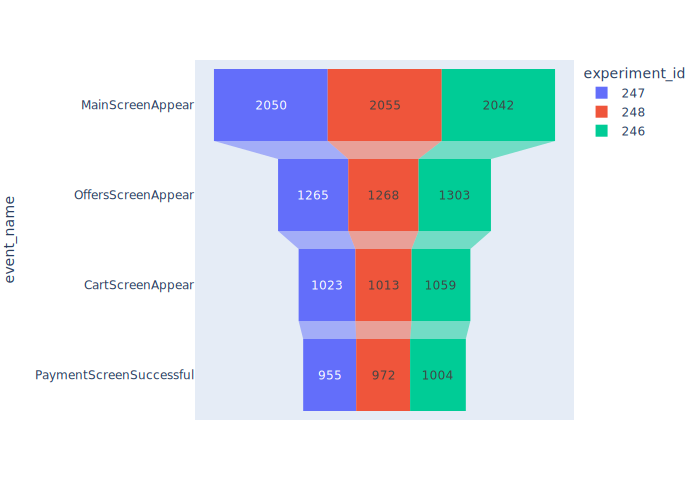

In [73]:
fig=px.funnel(funnel_by_groups,x='user_id',y='event_name',color='experiment_id')
fig.show(renderer="svg")

The plot suggests that there is a minimal difference between the three groups. We'll have to use statistical analysis to determine that.

##### How long did it take from mainScreen to purchase?

In [74]:
min_time=pd.pivot_table(df,index=['user_id'],columns=['event_name'],values=['timestamp'],aggfunc=min)['timestamp']

C:\Users\User\AppData\Local\Temp\ipykernel_7460\2646542090.py:1: FutureWarning:

The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.



In [75]:
min_time

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful
user_id,,,,
6888746892508752,NaT,2019-08-06 17:06:34,NaT,NaT
6909561520679493,2019-08-06 21:52:58,2019-08-06 21:52:54,2019-08-06 21:53:04,2019-08-06 21:52:58
6922444491712477,2019-08-04 17:19:40,2019-08-04 17:19:33,2019-08-04 17:19:46,2019-08-04 17:19:40
7435777799948366,NaT,2019-08-05 11:06:34,NaT,NaT
7702139951469979,2019-08-02 17:28:45,2019-08-01 07:29:54,2019-08-01 07:29:56,2019-08-02 17:28:45
...,...,...,...,...
9216094175241772920,NaT,2019-08-02 18:23:52,NaT,NaT
9217594193087726423,2019-08-02 12:00:58,NaT,2019-08-02 12:01:08,2019-08-02 12:00:57
9219463515465815368,2019-08-06 19:49:40,2019-08-05 08:26:26,2019-08-06 19:48:57,2019-08-06 19:52:16


In [76]:
new=min_time.reset_index()

In [77]:
new.head()

event_name,user_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful
0,6888746892508752,NaT,2019-08-06 17:06:34,NaT,NaT
1,6909561520679493,2019-08-06 21:52:58,2019-08-06 21:52:54,2019-08-06 21:53:04,2019-08-06 21:52:58
2,6922444491712477,2019-08-04 17:19:40,2019-08-04 17:19:33,2019-08-04 17:19:46,2019-08-04 17:19:40
3,7435777799948366,NaT,2019-08-05 11:06:34,NaT,NaT
4,7702139951469979,2019-08-02 17:28:45,2019-08-01 07:29:54,2019-08-01 07:29:56,2019-08-02 17:28:45


In [78]:
new['time_diff']=new['PaymentScreenSuccessful']-new['MainScreenAppear']
new.head()

event_name,user_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,time_diff
0,6888746892508752,NaT,2019-08-06 17:06:34,NaT,NaT,NaT
1,6909561520679493,2019-08-06 21:52:58,2019-08-06 21:52:54,2019-08-06 21:53:04,2019-08-06 21:52:58,0 days 00:00:04
2,6922444491712477,2019-08-04 17:19:40,2019-08-04 17:19:33,2019-08-04 17:19:46,2019-08-04 17:19:40,0 days 00:00:07
3,7435777799948366,NaT,2019-08-05 11:06:34,NaT,NaT,NaT
4,7702139951469979,2019-08-02 17:28:45,2019-08-01 07:29:54,2019-08-01 07:29:56,2019-08-02 17:28:45,1 days 09:58:51


In [79]:
new['time_diff'].value_counts().head(10)

time_diff
0 days 00:00:03    122
0 days 00:00:02    120
0 days 00:00:04    112
0 days 00:00:05     79
0 days 00:00:06     65
0 days 00:00:01     54
0 days 00:00:07     53
0 days 00:00:08     40
0 days 00:00:10     35
0 days 00:00:11     29
Name: count, dtype: int64

In [80]:
new['time_diff'].dt.days.value_counts()

time_diff
 0.0    2112
 1.0     274
 2.0     160
-1.0      87
 3.0      82
 4.0      50
 5.0      28
 6.0      13
-3.0      13
-5.0      11
-2.0      11
-4.0       8
-6.0       7
-7.0       2
Name: count, dtype: int64

In [81]:
new[new.time_diff.dt.days<0]

event_name,user_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,time_diff
9,15708180189885246,2019-08-01 14:06:19,2019-08-01 19:08:23,2019-08-01 08:38:55,2019-08-01 14:06:19,-1 days +18:57:56
28,40352430792344971,2019-08-03 12:55:20,2019-08-06 21:26:06,2019-08-01 22:51:45,2019-08-03 12:55:19,-4 days +15:29:13
31,46236857309457992,2019-08-02 17:40:45,2019-08-06 19:38:19,2019-08-02 17:40:18,2019-08-02 17:40:44,-5 days +22:02:25
67,105264533697038706,2019-08-01 10:19:14,2019-08-01 10:19:35,2019-08-01 10:18:44,2019-08-01 10:19:14,-1 days +23:59:39
151,240611722706801399,2019-08-01 14:23:14,2019-08-05 17:30:08,2019-08-01 14:23:08,2019-08-01 14:23:13,-5 days +20:53:05
...,...,...,...,...,...,...
5961,8820960297491579742,2019-08-01 17:37:47,2019-08-02 16:48:31,2019-08-01 17:37:46,2019-08-01 17:37:46,-1 days +00:49:15
6066,8982013177812162195,2019-08-05 00:09:57,2019-08-05 00:14:47,2019-08-05 00:10:04,2019-08-05 00:09:56,-1 days +23:55:09
6095,9043126402669164803,2019-08-03 15:07:17,2019-08-05 20:11:30,2019-08-03 15:05:56,2019-08-03 15:09:20,-3 days +18:57:50
6129,9097760240767809307,2019-08-01 12:10:18,2019-08-02 16:34:04,2019-08-01 00:08:20,2019-08-01 12:10:17,-2 days +19:36:13


##### In most cases, the purchase happen the same day of the first action on the website. Most of the time, it happens within few seconds  and up to a minute. we also get wierd results ( ex -1 day), which actually reflect what we found out previously: analyzing the typical path of a user experience we noticed that we might have some data that are cut or partial, so we  get Payment as first action, then we get  main screen appear. This should let us think about the reliabnbility of the dataset and the whole experiment...

# Step 5. Study the results of the experiment



##### How many users are there in each group?

In [82]:
df.groupby(['experiment_id'])['user_id'].nunique()

experiment_id
246    2069
247    2077
248    2082
Name: user_id, dtype: int64

In [83]:
#df.groupby(['user_id'])['experiment_id'].nunique().reset_index().query('experiment_id>1')

In [84]:
#There isn't intersection of users within the groups

### Test description

<li>We have two control groups in the A/A test, where we check our mechanisms and calculations. 
See if there is a statistically significant difference between samples 246 and 247: 
   <li> Select the most popular event. In each of the control groups, find the number of users who performed this action. 
Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events. Can you confirm that the groups were split properly? (A/A) 246 vs 247
<li>Do the same thing for the group with altered fonts. (A/B)

we are going to use the z test of proportions:A two-proportion Z-test is a statistical hypothesis test used to determine whether two proportions are different from each other. While performing the test, Z-statistics is computed from two independent samples and the null hypothesis is that the two proportions are equal.

requirements for proportion test:
   <li> The sampling method is simple random sampling.
  <li> Each sample point can result in just two possible outcomes. We call one of these outcomes a success and the other, a failure.
  <li> The sample includes at least 10 successes and 10 failures.
  <li> The population size is at least 20 times as big as the sample size.

H0: There is not a statistically significant difference in conversion rates for the tested group and for the control group.         Both Group A and group B conversion rates are equal

H1: There is a statistically significant differencein conversion rates for the tested group and for the control group.             Group A and group B conversion rates differs.

well'use significance level of 0.05:

The significance level, also known as alpha or α, is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and conclude that the effect is statistically significant. The researcher determines the significance level before conducting the experiment.

The significance level is the probability of rejecting the null hypothesis when it is true. A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that you require stronger evidence before you will reject the null hypothesis.

Since we need to perform several tests simultaneusly, we'll apply the Bonferroni correction: The Bonferroni correction is a multiple-comparison correction used when several dependent or independent statistical tests are being performed simultaneously (since while a given alpha value alpha may be appropriate for each individual comparison, it is not for the set of all comparisons). In order to avoid a lot of spurious positives, the alpha value needs to be lowered to account for the number of comparisons being performed.

The simplest and most conservative approach is the Bonferroni correction, which sets the alpha value for the entire set of n comparisons equal to alpha by taking the alpha value for each comparison equal to alpha/n

* n=12
* alpha/n =0.0041666666666667

In [85]:
test_1=df[df.experiment_id==246]['user_id'].nunique()
test_2=df[df.experiment_id==247]['user_id'].nunique()
control=df[df.experiment_id==248]['user_id'].nunique()

 We you need to check whether two test groups are significantly different in each event.

In [86]:
pivot=df.pivot_table(index='event_name', columns='experiment_id',values='user_id',aggfunc='nunique').reset_index()

In [87]:
print(pivot)

experiment_id               event_name   246   247   248
0                     CartScreenAppear  1059  1023  1013
1                     MainScreenAppear  2042  2050  2055
2                   OffersScreenAppear  1303  1265  1268
3              PaymentScreenSuccessful  1004   955   972


In [88]:
pivot[pivot.event_name=='CartScreenAppear'][246]

0    1059
Name: 246, dtype: int64

In [89]:
pivot[pivot.event_name=='CartScreenAppear'][246].iloc[0]

1059

In [90]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_name  4 non-null      object
 1   246         4 non-null      int64 
 2   247         4 non-null      int64 
 3   248         4 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 260.0+ bytes


Now we have lists with our users from each group and we can use it in calculation of our proportions) 

We can access this value of success directly from our pivot table)

In [91]:
from scipy import stats as st
import numpy as np
import math as mth

def check_hypothesis(group1,group2,event,alpha=0.0041666666666667):
    success1=pivot[pivot.event_name==event][group1].iloc[0]
    success2=pivot[pivot.event_name==event][group2].iloc[0]
    
    trials1=df[df.experiment_id==group1]['user_id'].nunique()
    trials2=df[df.experiment_id==group2]['user_id'].nunique()
    
    
    # success proportion in the first group:
    p1 = success1/trials1

    # success proportion in the second group:
    p2 = success2/trials2

    # success proportion in the combined dataset:
    p_combined = (success1 + success2) / (trials1 + trials2)

    # the difference between the datasets' proportions
    difference = p1 - p2
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1)
    # calculating the statistic in standard deviations of the standard normal distribution


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", group1,group2)
    else:
        print("Failed to reject the null hypothesis for",event,"and groups", group1,group2 )

In [92]:
check_hypothesis(246,247,'CartScreenAppear',alpha=0.0041666666666667)

p-value:  0.21387034309658048
Failed to reject the null hypothesis for CartScreenAppear and groups 246 247


What are we actually checking? Whether there is a statistical difference in conversion aka proportion - "Is the share of users (from all users in the test) that had "CartScreenAppear of one test group is statistically different from another?"

I can Iterate the test for all the events in the dataset:

In [93]:
for i in pivot.event_name.unique():
    check_hypothesis(246,247,i,alpha=0.0041666666666667)

p-value:  0.21387034309658048
Failed to reject the null hypothesis for CartScreenAppear and groups 246 247
p-value:  0.9886124438680264
Failed to reject the null hypothesis for MainScreenAppear and groups 246 247
p-value:  0.1694487258667574
Failed to reject the null hypothesis for OffersScreenAppear and groups 246 247
p-value:  0.10061326176027219
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 246 247


In [94]:
for i in pivot.event_name.unique():
    check_hypothesis(247,248,i,alpha=0.0041666666666667)

p-value:  0.6994092224188435
Failed to reject the null hypothesis for CartScreenAppear and groups 247 248
p-value:  0.9929050311157919
Failed to reject the null hypothesis for MainScreenAppear and groups 247 248
p-value:  0.9988538914575216
Failed to reject the null hypothesis for OffersScreenAppear and groups 247 248
p-value:  0.647961836053315
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 247 248


In [95]:
for i in pivot.event_name.unique():
    check_hypothesis(246,248,i,alpha=0.0041666666666667)

p-value:  0.10323052451945691
Failed to reject the null hypothesis for CartScreenAppear and groups 246 248
p-value:  0.9815186269070868
Failed to reject the null hypothesis for MainScreenAppear and groups 246 248
p-value:  0.1687512655508323
Failed to reject the null hypothesis for OffersScreenAppear and groups 246 248
p-value:  0.23529661239185828
Failed to reject the null hypothesis for PaymentScreenSuccessful and groups 246 248


# Overall Conclusions

We didn't find statistical difference among the three groups, in conversion and in the share of users that goes through the funnel. This result confirm the suggestion we had by reading the visual plot of the sale's funnel.

The goal of this analysis was to  determine how many users actually make it to the stage of purchase, how many get stuck at previous stages and which stages in particular. Also, analyze the of an A/A/B test. The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test. . To do so, I completed an analysis which consisted in the following steps:
 
* Data cleaning, consists of amending or removing incorrect or superfluous data, as well as checking for incompleteness or inconsistencies.
* Study of the dataframe
* Determined the timeline of the test
* Study of the purchase funnel
* Statistical analysis of the A/A/B test


I found out that :

* 47% of users complete the purchase 
* 49% of users don't pass the cart screen 
* There isn't statistical difference among the three groups, in conversion and in the share of users that goes through the funnel.

Therefore, it is possible to change the fonts in the entire app without seeing a substantial change in the conversion rate.